# Preamble

In [1]:
import numpy as np
import pandas as pd

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Load data

We are going to use public data from the [Wordbank project](http://wordbank.stanford.edu/) for this notebook.

We use Panda's `read_csv()` function to read a CSV file: 

In [23]:
data = pd.read_csv("data.csv")

The return object from `read_csv()` is a `DataFrame` object, which displays nicely in the notebook as tabular data:

In [4]:
data[:5]

,Unnamed: 0,data_id,num_item_id,age,language,sex,birth_order,ethnicity,produces,word
0,0,51699,13,27,English,Female,Fourth,Hispanic,False,alligator
1,1,51699,14,27,English,Female,Fourth,Hispanic,True,animal
2,2,51699,15,27,English,Female,Fourth,Hispanic,False,ant
3,3,51699,16,27,English,Female,Fourth,Hispanic,True,bear
4,4,51699,17,27,English,Female,Fourth,Hispanic,False,bee


Informally, a Pandas `DataFrame` is a table where each column is a `pandas.Series` object (which closely resembles a NumPy array).

Indeed, we can build a `DataFrame` from a set of NumPy arrays:

In [5]:
# 1. create NumPy arrays

x = np.linspace(-1, +1, 20)
sin_x = np.sin(x)
cos_x = np.cos(x)

# 2. create DataFrame with the given columns

trig = pd.DataFrame({'x': x, 'sin': sin_x, 'cos': cos_x})

# 3. show a few sample columns

trig[:5]

,cos,sin,x
0,0.540302,-0.841471,-1.000000
1,0.625724,-0.780044,-0.894737
2,0.704219,-0.709983,-0.789474
3,0.774918,-0.632061,-0.684211
4,0.837039,-0.547143,-0.578947


## Table manipulations

A `DataFrame` object as a `.shape` attribute like a 2D NumPy array:

In [6]:
data.shape

(234350, 10)

The above shows that our table has 234350 rows across 10 columns.  (**Note:** row index comes first, this will be important when accessing data with numerical indices below.)

The column names can be retrieved from the `.columns` attribute:

In [7]:
data.columns

Index([u'Unnamed: 0', u'data_id', u'num_item_id', u'age', u'language', u'sex',
       u'birth_order', u'ethnicity', u'produces', u'word'],
      dtype='object')

#### Removing columns

In order to do some data cleaning (and save memory), we drop the columns that are not used in the forthcoming analysis. A column may be deleted from the `DataFrame` with the statement:

        del data['name']

In [8]:
# save set of column names
before = set(data.columns)

In [24]:
# remove "unnamed" column
del data['Unnamed: 0']
del data['num_item_id']

In [10]:
# is there any change in the column set?
after = set(data.columns)
print(before - after)

set(['num_item_id', 'Unnamed: 0'])


It is easy to also see that the two unwanted columns are now gone:

In [25]:
data[:3]

,data_id,age,language,sex,birth_order,ethnicity,produces,word
0,51699,27,English,Female,Fourth,Hispanic,False,alligator
1,51699,27,English,Female,Fourth,Hispanic,True,animal
2,51699,27,English,Female,Fourth,Hispanic,False,ant


### Selecting a subset of the columns

Columns may be selected by name using the standard `[]`-lookup:

In [13]:
# print the first 3 rows of column 'produces'
data['produces'][:3]

0    False
1     True
2    False
Name: produces, dtype: bool

However, note that selecting *one* column only returns a `Series`, not a `DataFrame`:

In [16]:
type(data['produces'])

pandas.core.series.Series

It is possible to select *multiple* columns at once, in which case the returned object is a `DataFrame` again.  One must however use `[[ ... ]]` (i.e., *double* the square brackets):

In [17]:
data2 = data[['age', 'language', 'sex']]

In [18]:
data2[:5]

,age,language,sex
0,27,English,Female
1,27,English,Female
2,27,English,Female
3,27,English,Female
4,27,English,Female


It looks as if we've picked constant columns? A `DataFrame`'s `.describe()` method provides a quick statistical summary of the data (but only for *continuous* variables):

In [19]:
data2.describe()

,age
count,234350.000000
mean,22.342752
std,4.731628
min,16.000000
25%,18.000000
50%,23.000000
75%,27.000000
max,30.000000


### Modifying data

A Pandas `Series` object is pretty similar to a NumPy array, in that arithmetic and logical operations are performed element-wise.

In particular, the result of a comparison like the following is a `Series` object with logical values:

In [20]:
data['sex'] == 'Female'

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
234320    False
234321    False
234322    False
234323    False
234324    False
234325    False
234326    False
234327    False
234328    False
234329    False
234330    False
234331    False
234332    False
234333    False
234334    False
234335    False
234336    False
234337    False
234338    False
234339    False
234340    False
234341    False
234342    False
234343    False
234344    False
234345    False
234346    False
234347    False
234348    False
234349    False
Name: sex, dtype: bool

We can now pass such a selector array to a `Series`'s `[]` operator to modify a column at the row indices where the selector is `True`:

In [30]:
data['sex'][data['sex'] == 'Female'] = 1

/opt/Anaconda2-4.3.0-Linux-x86_64/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
data[:3]

,data_id,age,language,sex,birth_order,ethnicity,produces,word
0,51699,27,English,1,Fourth,Hispanic,False,alligator
1,51699,27,English,1,Fourth,Hispanic,True,animal
2,51699,27,English,1,Fourth,Hispanic,False,ant


#### Exercise 1. 

In table `data`, replace all occurrences of the string `'Male'` in column `'sex'` with the number `0`.

Can you compute how many female subjects were tested?

## Grouping data and aggregate computations

Let us tackle the following problem: *compute how many words are uttered by children of a given age.*

Since each subject has many table entries (one per uttered word), then we need first to aggregate rows based on subject (`data_id`) **and** age, then compute the number of words per subject.  At that point, we can further aggregate on age alone and sum.

The `.groupby()` method of `DataFrame`'s creates an intermediate object that is *like* a table with aggregate rows:

In [32]:
dg = data.groupby(['age', 'data_id'])

In [33]:
dg[:3]  # this is expected to fail

TypeError: unhashable type

The only methods that we can call on a "groupby" object are those that apply a summarization function to the row groups.  Any function that can operate on `Series` objects or NumPy arrays can be used for aggregation.  The aggregation process requires a dictionary, mapping column names to the function to apply to that column.  Columns that are not named in that dictionary will be discarded.

In [34]:
data2 = dg.agg({'produces': np.sum})

In [35]:
data2[:3]

produces
age data_id          
16  51716         2.0
    51733         3.0
    51740         3.0

Note anything strange in the table output above?

The new table has a *composite* index `[age, data_id]`; in order to perform further aggregation on `age` alone, we must *reset* the indices using method `.reset_index()`.  Note that `.reset_index()` returns a *new* `DataFrame`, does not modify the one it's called on in-place.

In [36]:
data3 = data2.reset_index()

In [38]:
data3[:3]

,age,data_id,produces
0,16,51716,2.0
1,16,51733,3.0
2,16,51740,3.0


### Exercise 2.

Define a `DataFrame` object `data4` by aggregating over age and summing over the `'produces'` column.

In [44]:
# aggregate
grouped = data3.groupby('age')

# sum over 'produces' column
data4 = grouped.agg({'produces': np.sum})

# show
data4[:3]

,produces
age,
16,6032.0
17,1926.0
18,5107.0


Again we must reset the index; this time we shall do it in-place (= modify `data4`):

In [45]:
data4.reset_index(inplace=True)

Seaborn provides an easy-to-use `.barplot` function:

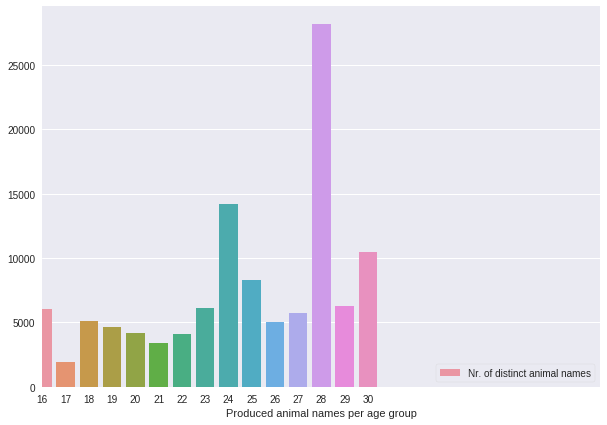

In [46]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(1, figsize=(10, 7))

# Plot the total crashes
sns.barplot(x="age", y="produces", data=data4, label="Nr. of distinct animal names")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Produced animal names per age group")
sns.despine(left=True, bottom=True)

### Exercise 4.

What's wrong with the above data?  How can you modify the procedure to fix it?

## A bit of statistics

One of the requisites for drawing sensible insights from this data is that the data is e.g., age-matched among male and female subjects.  For this we can compute the distribution of ages of male and female subjects, and compare them using a $t$-test.

In [58]:
dg = data.groupby(['data_id', 'sex'])

In [60]:
data5 = dg.agg({'age': np.mean})

In [61]:
data5[:3]

,,age
data_id,sex,
51699,1,27
51700,1,21
51701,1,26


In [62]:
data5.reset_index(inplace=True)

In [64]:
data5['age'].describe()

count    4024.000000
mean       22.469930
std         4.918889
min        16.000000
25%        18.000000
50%        23.000000
75%        28.000000
max        30.000000
Name: age, dtype: float64

In [65]:
data5['sex'].describe()

count     4024
unique       2
top       Male
freq      2071
Name: sex, dtype: object

In [66]:
females = (data5['sex'] == 1)
males = (data5['sex'] == 'Male')
ages = data5['age']

In [69]:
ages_f = ages[females]

ages_f.describe()

count    1953.000000
mean       22.437276
std         4.897126
min        16.000000
25%        18.000000
50%        23.000000
75%        28.000000
max        30.000000
Name: age, dtype: float64

In [70]:
ages_m = ages[males]

ages_m.describe()

count    2071.000000
mean       22.500724
std         4.940308
min        16.000000
25%        18.000000
50%        23.000000
75%        28.000000
max        30.000000
Name: age, dtype: float64

For simple statistical tests we can use the [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) module of [`scipy`](http://docs.scipy.org/doc/):

In [71]:
from scipy import stats

The function to perform a 2-sample $t$-test is [`scipy.stats.ttest_ind()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind):

In [72]:
stats.ttest_ind(ages_m, ages_f)

Ttest_indResult(statistic=0.40890294094302393, pvalue=0.68263266183280469)

Actually we should only apply $t$-test to normally-distributed data (approx), so at least a visual check won't do harm!  Seaborn provides a very convenient function for it:

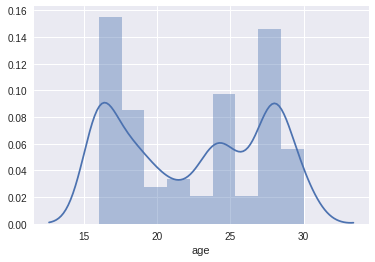

In [73]:
sns.distplot(ages_m)

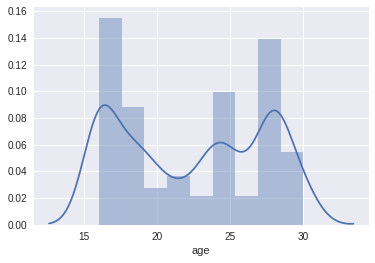

In [74]:
sns.distplot(ages_f)